In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('display.float_format', lambda x: '%.1f' % x)

#Fixed size for all plots
plt.rcParams['figure.figsize']=18,8

#Import Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
t = pd.read_csv('/home/jovyan/work/SampleProjects/db/sample_3849_32.csv', sep=',',index_col=0)
t.head(5)

,average_order_value,best_day,best_hour,between_7_to_8_gmt,email_last_send_date,first_seen_date,frequency_score,highest_order_value,last_payment_method,last_purchase_date,...,recency_score,rfm_total_score,segmentation_last_process_date,session_on_sunday,time_to_first_purchase,total_event_done,total_frequency_monetary,total_revenue,user_id,user_tag
0,175924.3,wednesday,5.0,1.0,2017-02-23T03:20:52,2017-01-12T15:36:41,1.0,349800.0,payment_method_atm_transfer,2017-02-03T09:02:08,...,9.0,19.0,1970-01-01T00:00:00,1.0,0.0,10.0,10.0,527773.0,5877a28a8d8fb54760d02598,customer
1,68000.0,saturday,1.0,1.0,2017-02-23T03:20:49,2014-02-20T18:26:02,0.0,68000.0,mandiri clickpay,2016-08-13T00:39:20,...,6.0,15.0,1970-01-01T00:00:00,4.0,904.0,30.0,9.0,68000.0,5776af877b685136788b7152,customer
2,95000.0,wednesday,7.0,3.0,2017-02-14T13:00:24,2016-08-24T02:41:18,1.0,120000.0,briva,2016-10-02T11:47:47,...,8.0,18.0,2016-11-14T22:01:48,1.0,0.0,29.0,10.0,285000.0,57bd094e8dbb1b1c038b456d,customer
3,102250.0,saturday,15.0,4.0,2017-02-16T04:55:52,2016-09-02T09:50:07,0.0,176000.0,indomaret,2016-10-28T12:48:35,...,9.0,18.0,2016-11-16T01:27:27,17.0,40.0,391.0,9.0,204500.0,57c94b4f8dbb1b90c68b456c,customer
4,97500.0,friday,12.0,3.0,2017-02-23T03:22:13,2016-02-12T18:32:20,0.0,100000.0,transfer bank,2016-11-29T11:53:38,...,9.0,18.0,2016-11-20T13:29:34,16.0,286.0,594.0,9.0,195000.0,57ac5f2b8dbb1b002f8b4587,customer


In [3]:
t.columns

Index(['average_order_value', 'best_day', 'best_hour', 'between_7_to_8_gmt',
       'email_last_send_date', 'first_seen_date', 'frequency_score',
       'highest_order_value', 'last_payment_method', 'last_purchase_date',
       'last_purchase_value', 'last_seen_date', 'lifecycle_id',
       'lowest_order_value', 'monetary_score', 'orders_with_promo_count',
       'orders_with_promo_percent', 'orders_without_promo_count',
       'orders_without_promo_percent', 'pin_code', 'purchased',
       'push_last_send_date', 'recency_score', 'rfm_total_score',
       'segmentation_last_process_date', 'session_on_sunday',
       'time_to_first_purchase', 'total_event_done',
       'total_frequency_monetary', 'total_revenue', 'user_id', 'user_tag'],
      dtype='object')

In [4]:
t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 3848
Data columns (total 32 columns):
average_order_value               3849 non-null float64
best_day                          3849 non-null object
best_hour                         3849 non-null float64
between_7_to_8_gmt                3849 non-null float64
email_last_send_date              3849 non-null object
first_seen_date                   3849 non-null object
frequency_score                   3849 non-null float64
highest_order_value               3849 non-null float64
last_payment_method               3849 non-null object
last_purchase_date                3849 non-null object
last_purchase_value               3849 non-null float64
last_seen_date                    3849 non-null object
lifecycle_id                      3849 non-null float64
lowest_order_value                3849 non-null float64
monetary_score                    3849 non-null float64
orders_with_promo_count           3849 non-null float64
ord

(array([  3.78300000e+03,   3.70000000e+01,   7.00000000e+00,
          8.00000000e+00,   7.00000000e+00,   2.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          2.00000000e+00]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.]),
 <a list of 10 Patch objects>)

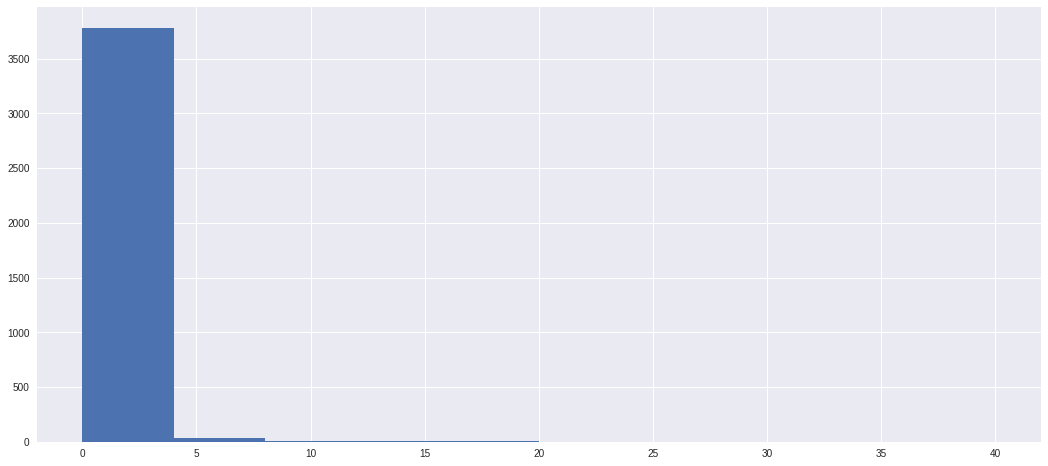

In [33]:
t.orders_with_promo_count.value_counts()
plt.hist(t.orders_with_promo_count[t.orders_with_promo_count<80])

In [5]:
t['lifecyleName'] = np.where(t['lifecycle_id']==19498, 'Contact', '')
t['lifecyleName'] = np.where(t['lifecycle_id']==19509, 'New_Promising_Customer',t['lifecyleName'])
t['lifecyleName'] = np.where(t['lifecycle_id']==19499, 'New_Customer',t['lifecyleName'])
t['lifecyleName'] = np.where(t['lifecycle_id']==19500, 'Active_One_Time_buyer',t['lifecyleName'])
t['lifecyleName'] = np.where(t['lifecycle_id']==19506, 'Active_Loyal',t['lifecyleName'])
t['lifecyleName'] = np.where(t['lifecycle_id']==19503, 'Active_Repeat',t['lifecyleName'])
t['lifecyleName'] = np.where(t['lifecycle_id']==19502, 'Lost_One_Time_buyer',t['lifecyleName'])
t['lifecyleName'] = np.where(t['lifecycle_id']==19501, 'Risk_One_Time_buyer',t['lifecyleName'])
t['lifecyleName'] = np.where(t['lifecycle_id']==19505, 'Lost_repeat',t['lifecyleName'])
t['lifecyleName'] = np.where(t['lifecycle_id']==19504, 'Risk_repeat',t['lifecyleName'])
t['lifecyleName'] = np.where(t['lifecycle_id']==19507, 'Risk_Loyal',t['lifecyleName'])
t['lifecyleName'] = np.where(t['lifecycle_id']==19508, 'Lost_Loyal',t['lifecyleName'])

In [7]:
t.average_order_value.head(5)

0   175924.3
1    68000.0
2    95000.0
3   102250.0
4    97500.0
Name: average_order_value, dtype: float64

In [8]:
t.average_order_value.describe()


count       3849.0
mean      415742.8
std      1053079.1
min         4050.0
25%        87700.0
50%       156600.0
75%       347928.6
max     22491154.1
Name: average_order_value, dtype: float64

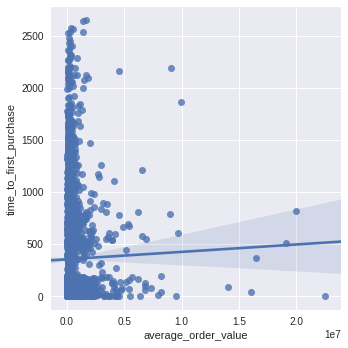

In [68]:
f5 = sns.lmplot(data=t, y="time_to_first_purchase", 
              x ="average_order_value")

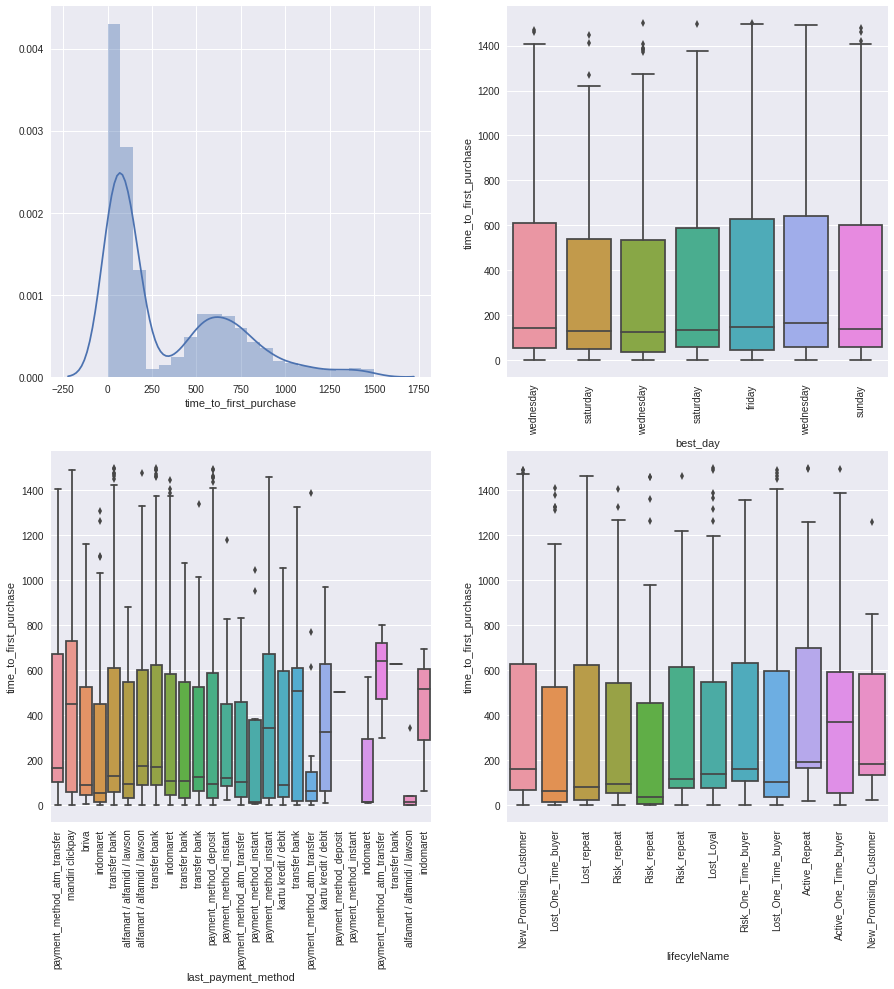

In [74]:
fig, ax = plt.subplots(2,2, figsize=(15,15))
f1 = sns.distplot(t.time_to_first_purchase[(t.time_to_first_purchase<1500) & (t.time_to_first_purchase>0) ] , 
                    ax=ax[0,0])
f2 = sns.boxplot(y=t.time_to_first_purchase[(t.time_to_first_purchase<1500) & (t.time_to_first_purchase>0) ], 
                x =t.lifecyleName,  ax=ax[1,1]).set_xticklabels(t.lifecyleName, rotation=90)

f3 = sns.boxplot(y=t.time_to_first_purchase[(t.time_to_first_purchase<1500) & (t.time_to_first_purchase>0) ], 
                x =t.last_payment_method,  ax=ax[1,0]).set_xticklabels(t.last_payment_method, rotation=90)
f4 = sns.boxplot(y=t.time_to_first_purchase[(t.time_to_first_purchase<1500) & (t.time_to_first_purchase>0) ], 
                x =t.best_day,  ax=ax[0,1]).set_xticklabels(t.best_day, rotation=90)



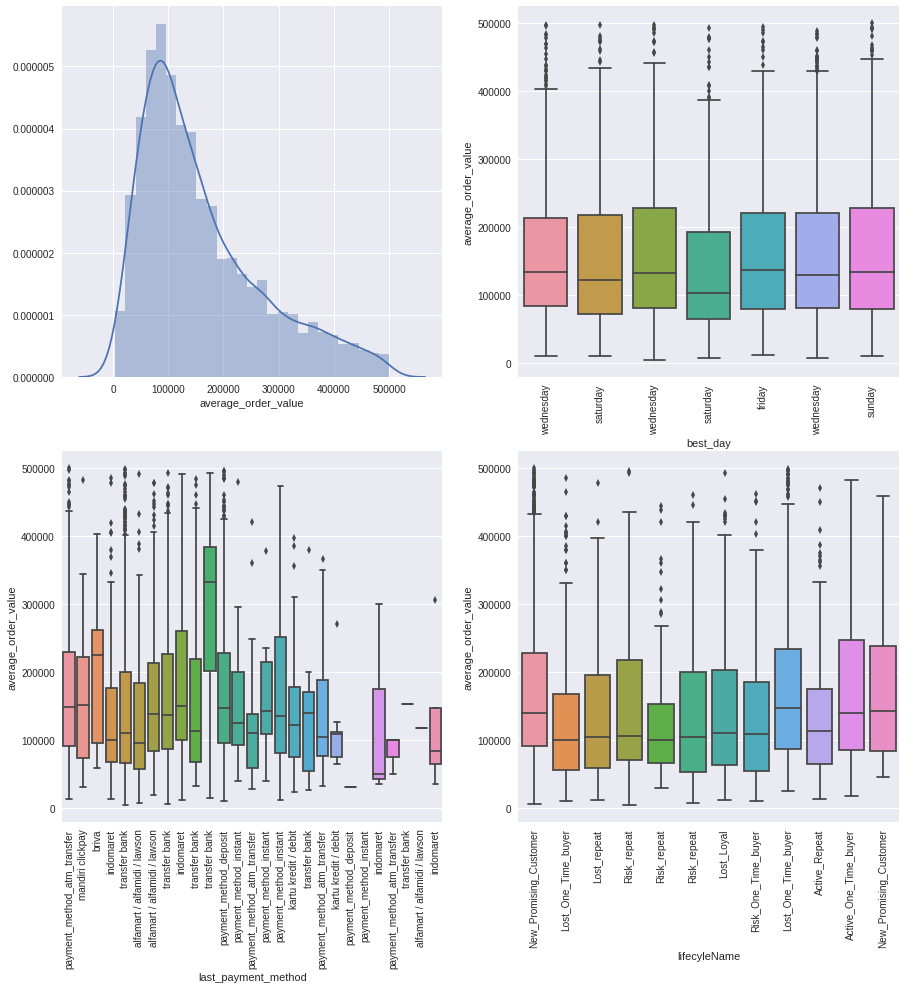

In [75]:
fig, ax = plt.subplots(2,2, figsize=(15,15))
f1 = sns.distplot(t.average_order_value[(t.average_order_value<500000) & (t.average_order_value>100) ] , 
                    ax=ax[0,0])
f2 = sns.boxplot(y=t.average_order_value[(t.average_order_value<500000) & (t.average_order_value>100) ], 
                x =t.lifecyleName,  ax=ax[1,1]).set_xticklabels(t.lifecyleName, rotation=90)

f3 = sns.boxplot(y=t.average_order_value[(t.average_order_value<500000) & (t.average_order_value>100) ], 
                x =t.last_payment_method,  ax=ax[1,0]).set_xticklabels(t.last_payment_method, rotation=90)
f4 = sns.boxplot(y=t.average_order_value[(t.average_order_value<500000) & (t.average_order_value>100) ], 
                x =t.best_day,  ax=ax[0,1]).set_xticklabels(t.best_day, rotation=90)





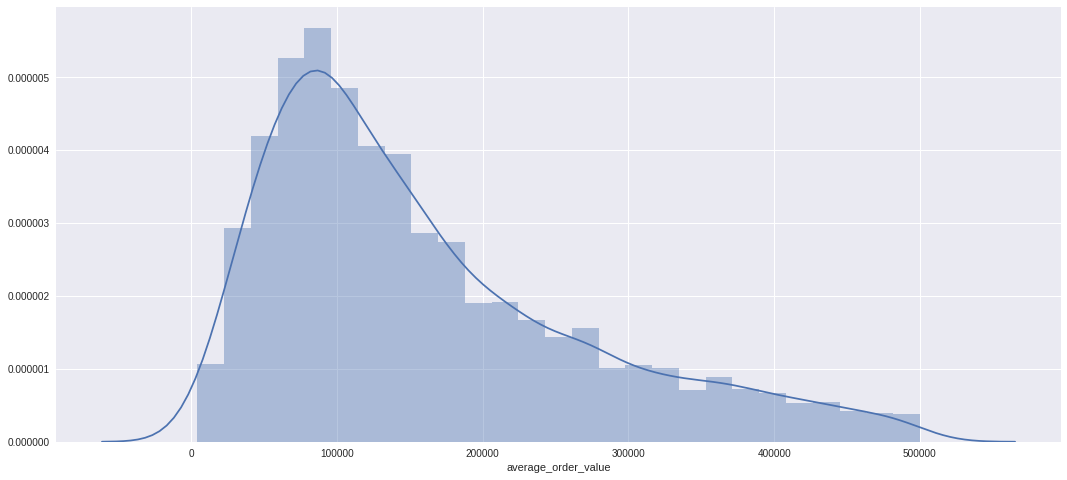

In [9]:
vis1 = sns.distplot(t.average_order_value[(t.average_order_value<500000) & (t.average_order_value>100) ])


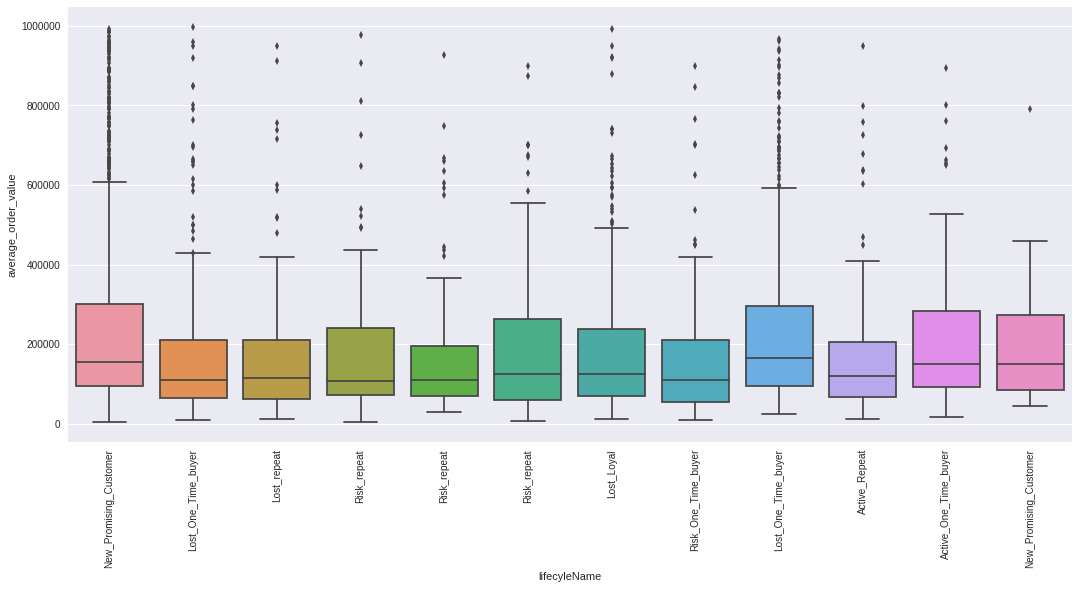

In [11]:
sns.boxplot(y=t.average_order_value[(t.average_order_value<1000000) & (t.average_order_value>100) ], 
                   x =t.lifecyleName).set_xticklabels(t.lifecyleName, rotation=90)
plt.show()
